### 1) Load required libraries and define required functions

In [75]:
import time
from datetime import timedelta

In [76]:
import warnings
warnings.filterwarnings('ignore')

In [77]:
import pandas            as  pd
import numpy             as  np
import seaborn           as  sns
import matplotlib.pyplot as  plt
import statsmodels.api   as  sm
import sys, os

print("\nCurrent working directory %s" %os.getcwd())

os.chdir(r'D:\DrPKV\20220713')


Current working directory D:\DrPKV\20220713


In [78]:
import  matplotlib.pyplot              as       plt
### -------------------------------------------------------------------------
from    sklearn.tree                   import   DecisionTreeClassifier
from    sklearn.ensemble               import   RandomForestClassifier
from    xgboost                        import   XGBClassifier
### -------------------------------------------------------------------------
from    sklearn.metrics          import  accuracy_score, roc_auc_score
from    scipy.stats              import  mode


In [79]:
"""    
1)   Function name: draw_cm
    
     Description: This function does the following:
         
                  Plots a heat graph for confusion matrix 
     Input:
            1) Data Frame containing actual values
     
            2) Data frame containing predicted values
    
    
     Output:
            1) a nice confusion matrix graph      

"""

def draw_cm( actual, predicted ):
    
    import matplotlib.pyplot as      plt
    import sklearn.metrics   as      metrics
    import seaborn           as      sns
    from   sklearn.metrics   import  classification_report
    
    cm = metrics.confusion_matrix( actual, predicted )
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Solvant", "NPA"] , yticklabels = ["Solvant", "NPA"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    measures_     = classification_report(actual, predicted) 
    print(measures_) 

### -----------------------------------------------------------------------------------------------------------------------------    

In [80]:
"""
2)   Function name: draw_roc
    
     Description: This function does the following:
                  i) plots a ROC and reports the area under ROC for the specified input
     Input:
          1) Data Frame containing actual values for the target variable
    
          2) Data frame containing predicted probabilities
    
    
     Output:
          1) a nice ROC graph with AUROC mentioned     

"""

def draw_roc( actual, probs ):

    import pandas            as   pd
    import numpy             as   np
    import seaborn           as   sns
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

### -----------------------------------------------------------------------------------------------------------------------------    

In [81]:
### ----------------------------------------    
def draw_barplot(data, title, target):
### ----------------------------------------    
    plt.figure(figsize = (10, 6))
    DF          =  data[target]
    latedelrisk =  DF.value_counts()
    values      = latedelrisk.keys().tolist()
    counts      = latedelrisk.tolist()
    ax          =  sns.barplot(x = values, y =  counts, data = data)
    titlex      =  '\n' + title + '\n'
    plt.title(titlex)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(target, fontsize=12)
    # now simply assign the bar values to
    # each bar by passing containers method
    # to bar_label function
    ax.bar_label(container = ax.containers[0], padding = 3)
    plt.show()

In [82]:
start_time = time.time()

### 2) Read data files

In [83]:
file_X_train_name   =   './Output/X_train_compact_dataset_ten_20220713050301PM.csv'
X_train          =   pd.read_csv(file_X_train_name)
print("X Training dataset dimension {}".format(X_train.shape))
print(X_train.columns)

X Training dataset dimension (6300, 12)
Index(['Cash_ratio', 'Changeinsales_Industry', 'debt_equity', 'debt_income',
       'Interest_coverage', 'Quick_ratio', 'ROE(new)', 'ROS(new)', 'Sales_CE',
       'Total shareholders' funds', 'Slno', 'Shareholderquity_code'],
      dtype='object')


In [84]:
file_X_test_name   =   './Output/X_test_compact_dataset_ten_20220713050301PM.csv'
X_test             =   pd.read_csv(file_X_test_name)
print("X Test dataset dimension {}".format(X_test.shape))
print(X_test.columns)

X Test dataset dimension (2700, 12)
Index(['Cash_ratio', 'Changeinsales_Industry', 'debt_equity', 'debt_income',
       'Interest_coverage', 'Quick_ratio', 'ROE(new)', 'ROS(new)', 'Sales_CE',
       'Total shareholders' funds', 'Slno', 'Shareholderquity_code'],
      dtype='object')


In [85]:
file_y_train_name   =   './Output/y_train_compact_dataset_ten_20220713050301PM.csv'
y_train             =   pd.read_csv(file_y_train_name)
print("y Training dataset dimension {}".format(y_train.shape))
print(y_train.columns)

y Training dataset dimension (6300, 1)
Index(['Target'], dtype='object')


In [86]:
file_y_test_name   =   './Output/y_test_compact_dataset_ten_20220713050301PM.csv'
y_test             =   pd.read_csv(file_y_test_name)
print("y Test dataset dimension {}".format(y_test.shape))
print(y_test.columns)

y Test dataset dimension (2700, 1)
Index(['Target'], dtype='object')


In [87]:
y_train.value_counts()

Target
0         5373
1          927
dtype: int64

In [88]:
y_test.value_counts()

Target
0         2302
1          398
dtype: int64

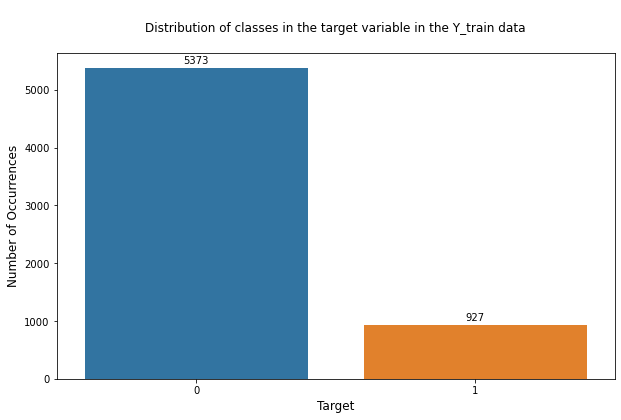

In [89]:
### Barplot for X_test data
titlex      =     'Distribution of classes in the target variable in the Y_train data'
draw_barplot(data = y_train, title = titlex, target= 'Target')

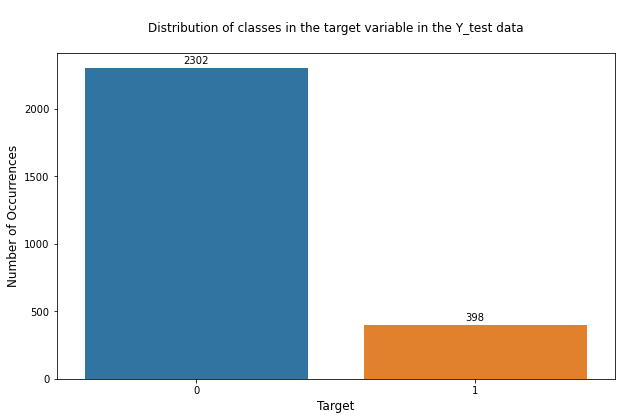

In [90]:
### Barplot for y_test data
titlex      =     'Distribution of classes in the target variable in the Y_test data'
draw_barplot(data = y_test, title = titlex, target= 'Target')

In [91]:
X_train_  =  X_train[['Cash_ratio', 'Changeinsales_Industry', 'debt_equity', 'debt_income','Interest_coverage',\
                       'Quick_ratio', 'ROE(new)', 'ROS(new)', 'Sales_CE',"Total shareholders' funds"]]

### CART

In [92]:
# Creating the classifier object
clf_gini = DecisionTreeClassifier() 

In [93]:
print("\n\nDefault parameters used for this building this Decision Tree model\n\n")
clf_gini.get_params()



Default parameters used for this building this Decision Tree model




{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [94]:
clf_gini.fit(X_train_, y_train)

DecisionTreeClassifier()

In [95]:
Train_y_pred_CART     =    list(clf_gini.predict(X_train_))

In [96]:
X_train_data              =    X_train.copy()
X_train_data['CART']      =    Train_y_pred_CART

In [97]:
X_train_data.columns

Index(['Cash_ratio', 'Changeinsales_Industry', 'debt_equity', 'debt_income',
       'Interest_coverage', 'Quick_ratio', 'ROE(new)', 'ROS(new)', 'Sales_CE',
       'Total shareholders' funds', 'Slno', 'Shareholderquity_code', 'CART'],
      dtype='object')

In [98]:
y_train.columns

Index(['Target'], dtype='object')

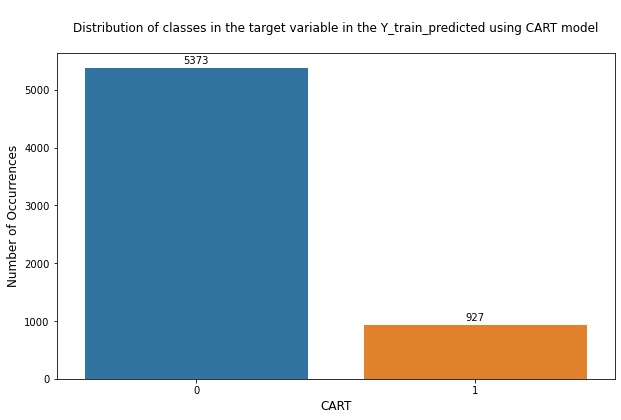

In [99]:
### Barplot for y_train_pred data
titlex      =     'Distribution of classes in the target variable in the Y_train_predicted using CART model'
draw_barplot(data = X_train_data, title = titlex, target= 'CART')

In [100]:
X_test.columns

Index(['Cash_ratio', 'Changeinsales_Industry', 'debt_equity', 'debt_income',
       'Interest_coverage', 'Quick_ratio', 'ROE(new)', 'ROS(new)', 'Sales_CE',
       'Total shareholders' funds', 'Slno', 'Shareholderquity_code'],
      dtype='object')

In [101]:
X_test_             =    X_test[['Cash_ratio', 'Changeinsales_Industry', 'debt_equity', 'debt_income','Interest_coverage',\
                       'Quick_ratio', 'ROE(new)', 'ROS(new)', 'Sales_CE',"Total shareholders' funds"]]
Test_y_pred_CART    =    list(clf_gini.predict(X_test_))

In [102]:
X_test_data              =    X_test.copy()
X_test_data['CART']      =    Test_y_pred_CART

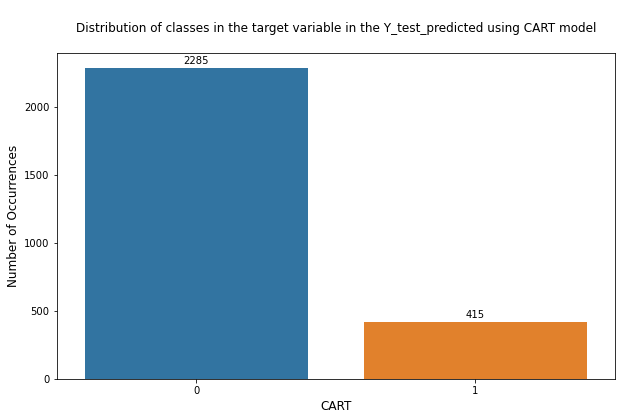

In [103]:
### Barplot for y_test_pred data
titlex      =     'Distribution of classes in the target variable in the Y_test_predicted using CART model'
draw_barplot(data = X_test_data, title = titlex, target= 'CART')


Training data




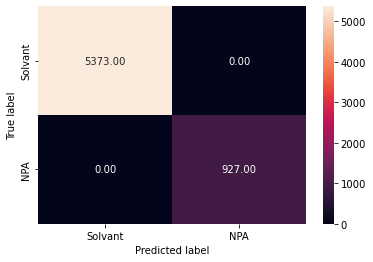

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5373
           1       1.00      1.00      1.00       927

    accuracy                           1.00      6300
   macro avg       1.00      1.00      1.00      6300
weighted avg       1.00      1.00      1.00      6300



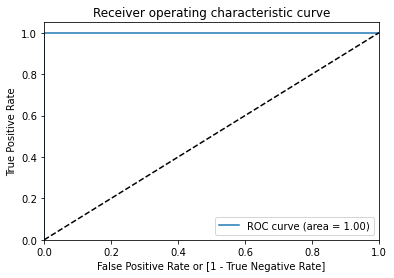

(array([0., 0., 1.]), array([0., 1., 1.]), array([2, 1, 0], dtype=int64))

In [104]:
actual    =  y_train['Target']
predicted =  X_train_data['CART']
print("\nTraining data\n\n")
draw_cm( actual, predicted)
draw_roc(actual, predicted)


Test data




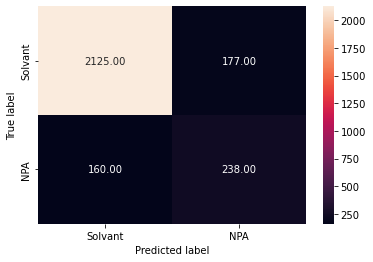

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2302
           1       0.57      0.60      0.59       398

    accuracy                           0.88      2700
   macro avg       0.75      0.76      0.76      2700
weighted avg       0.88      0.88      0.88      2700



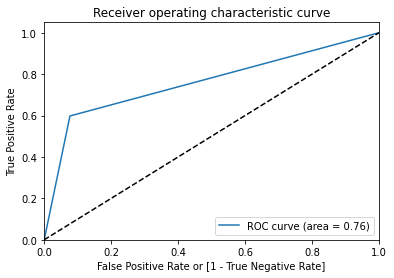

(array([0.        , 0.07688966, 1.        ]),
 array([0.        , 0.59798995, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [105]:
actual    =  y_test['Target']
predicted =  X_test_data['CART']
print("\nTest data\n\n")
draw_cm( actual, predicted)
draw_roc(actual, predicted)

### Creating the classifier object for Random Forest

In [106]:
clf_RF = RandomForestClassifier() 

In [107]:
print("\n\nDefault parameters used for this building this Random Forest model\n\n")
clf_RF.get_params()



Default parameters used for this building this Random Forest model




{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [108]:
clf_RF.fit(X_train_, y_train)

RandomForestClassifier()

In [109]:
Train_y_pred_RF     =    list(clf_RF.predict(X_train_))

In [110]:
X_train_data['RF']        =    Train_y_pred_RF

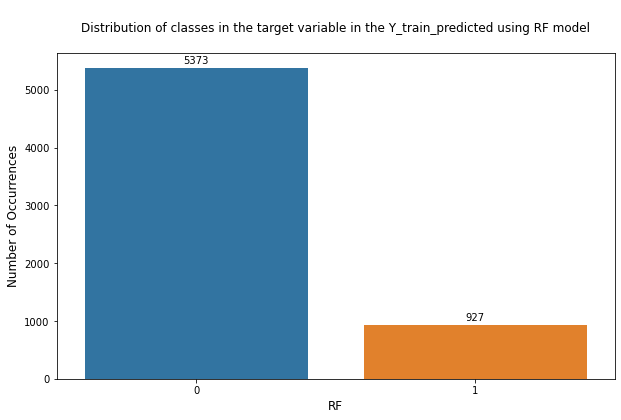

In [111]:
### Barplot for y_train_pred data
titlex      =     'Distribution of classes in the target variable in the Y_train_predicted using RF model'
draw_barplot(data = X_train_data, title = titlex, target= 'RF')

In [112]:
X_test_             =    X_test[['Cash_ratio', 'Changeinsales_Industry', 'debt_equity', 'debt_income','Interest_coverage',\
                       'Quick_ratio', 'ROE(new)', 'ROS(new)', 'Sales_CE',"Total shareholders' funds"]]
Test_y_pred_rf     =    list(clf_RF.predict(X_test_))

In [113]:
X_test_data['RF']      =    Test_y_pred_rf

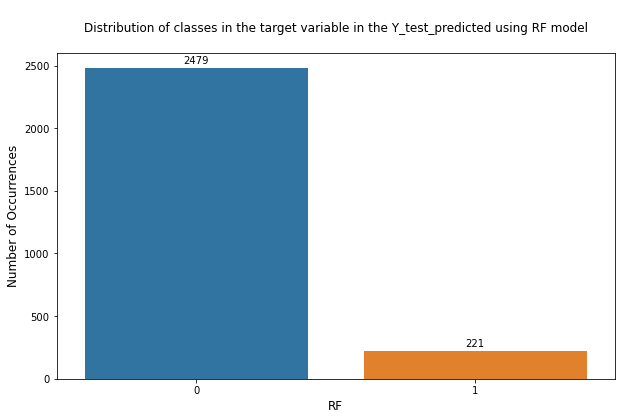

In [114]:
### Barplot for y_test_pred data
titlex      =     'Distribution of classes in the target variable in the Y_test_predicted using RF model'
draw_barplot(data = X_test_data, title = titlex, target= 'RF')


Training data




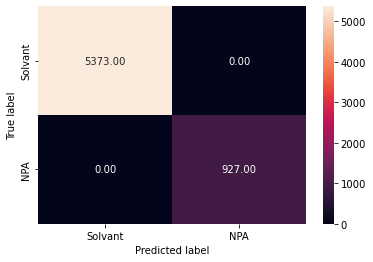

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5373
           1       1.00      1.00      1.00       927

    accuracy                           1.00      6300
   macro avg       1.00      1.00      1.00      6300
weighted avg       1.00      1.00      1.00      6300



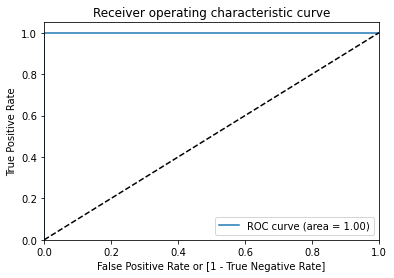

(array([0., 0., 1.]), array([0., 1., 1.]), array([2, 1, 0], dtype=int64))

In [115]:
actual    =  y_train['Target']
predicted =  X_train_data['RF']
print("\nTraining data\n\n")
draw_cm( actual, predicted)
draw_roc(actual, predicted)


Test data




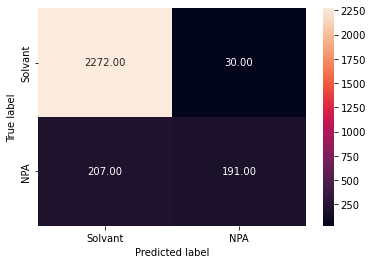

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2302
           1       0.86      0.48      0.62       398

    accuracy                           0.91      2700
   macro avg       0.89      0.73      0.78      2700
weighted avg       0.91      0.91      0.90      2700



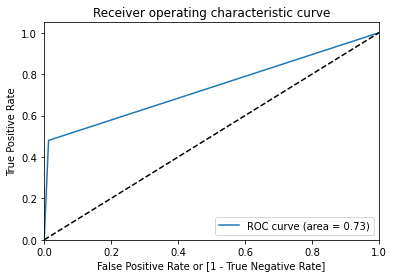

(array([0.        , 0.01303215, 1.        ]),
 array([0.       , 0.4798995, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [116]:
actual    =  y_test['Target']
predicted =  X_test_data['RF']
print("\nTest data\n\n")
draw_cm( actual, predicted)
draw_roc(actual, predicted)

### Creating the classifier object for XGBoost

In [117]:
clf_XGB     =    XGBClassifier() 

In [118]:
print("\n\nDefault parameters used for this building this XGBoost model\n\n")
clf_XGB.get_params()



Default parameters used for this building this XGBoost model




{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [119]:
clf_XGB.fit(X_train_, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [120]:
Train_y_pred_XGB          =    list(clf_XGB.predict(X_train_))

In [121]:
X_train_data['XGB']        =    Train_y_pred_XGB

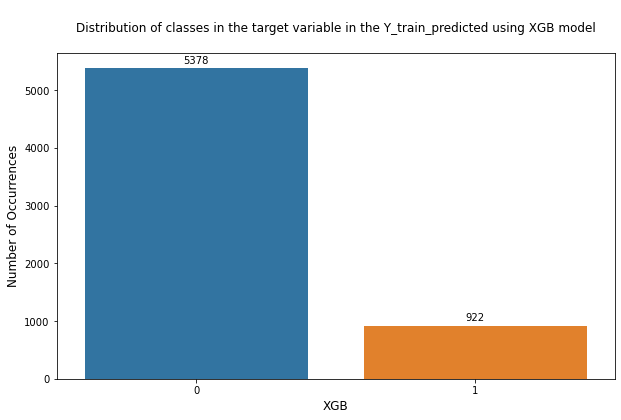

In [122]:
### Barplot for y_train_pred data
titlex      =     'Distribution of classes in the target variable in the Y_train_predicted using XGB model'
draw_barplot(data = X_train_data, title = titlex, target= 'XGB')

In [123]:
Test_y_pred_xgb         =    list(clf_XGB.predict(X_test_))
X_test_data['XGB']      =    Test_y_pred_xgb

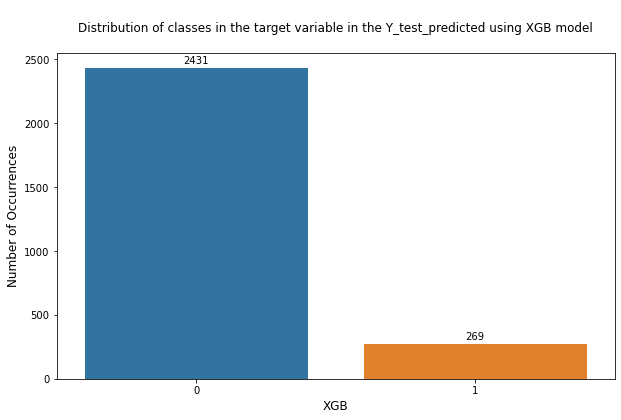

In [124]:
### Barplot for y_test_pred data
titlex      =     'Distribution of classes in the target variable in the Y_test_predicted using XGB model'
draw_barplot(data = X_test_data, title = titlex, target = 'XGB')


Training data




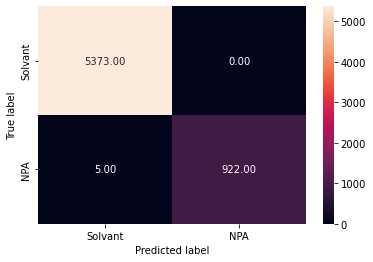

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5373
           1       1.00      0.99      1.00       927

    accuracy                           1.00      6300
   macro avg       1.00      1.00      1.00      6300
weighted avg       1.00      1.00      1.00      6300



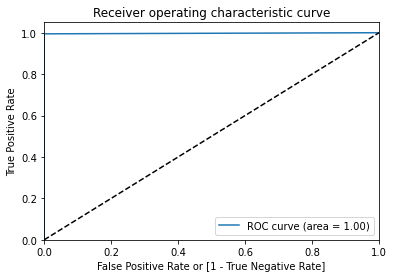

(array([0., 0., 1.]),
 array([0.        , 0.99460626, 1.        ]),
 array([2, 1, 0]))

In [125]:
actual    =  y_train['Target']
predicted =  X_train_data['XGB']
print("\nTraining data\n\n")
draw_cm( actual, predicted)
draw_roc(actual, predicted)


Test data




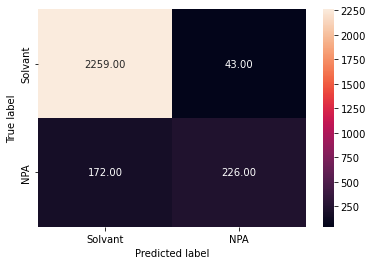

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2302
           1       0.84      0.57      0.68       398

    accuracy                           0.92      2700
   macro avg       0.88      0.77      0.82      2700
weighted avg       0.92      0.92      0.91      2700



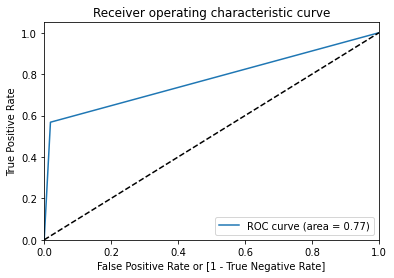

(array([0.        , 0.01867941, 1.        ]),
 array([0.       , 0.5678392, 1.       ]),
 array([2, 1, 0]))

In [126]:
actual    =  y_test['Target']
predicted =  X_test_data['XGB']
print("\nTest data\n\n")
draw_cm( actual, predicted)
draw_roc(actual, predicted)

In [127]:
X_train_data.columns

Index(['Cash_ratio', 'Changeinsales_Industry', 'debt_equity', 'debt_income',
       'Interest_coverage', 'Quick_ratio', 'ROE(new)', 'ROS(new)', 'Sales_CE',
       'Total shareholders' funds', 'Slno', 'Shareholderquity_code', 'CART',
       'RF', 'XGB'],
      dtype='object')

In [128]:
X_test_data.columns

Index(['Cash_ratio', 'Changeinsales_Industry', 'debt_equity', 'debt_income',
       'Interest_coverage', 'Quick_ratio', 'ROE(new)', 'ROS(new)', 'Sales_CE',
       'Total shareholders' funds', 'Slno', 'Shareholderquity_code', 'CART',
       'RF', 'XGB'],
      dtype='object')

In [129]:
list_tr                   =  ['CART', 'RF', 'XGB']
X_train_data['Consensus'] =  X_train_data[list_tr].mode(axis = 1)

In [130]:
X_test_data['Consensus'] =  X_test_data[['CART', 'RF', 'XGB']].mode(axis = 1)

In [131]:
X_train_data.columns

Index(['Cash_ratio', 'Changeinsales_Industry', 'debt_equity', 'debt_income',
       'Interest_coverage', 'Quick_ratio', 'ROE(new)', 'ROS(new)', 'Sales_CE',
       'Total shareholders' funds', 'Slno', 'Shareholderquity_code', 'CART',
       'RF', 'XGB', 'Consensus'],
      dtype='object')

In [132]:
X_test_data.columns

Index(['Cash_ratio', 'Changeinsales_Industry', 'debt_equity', 'debt_income',
       'Interest_coverage', 'Quick_ratio', 'ROE(new)', 'ROS(new)', 'Sales_CE',
       'Total shareholders' funds', 'Slno', 'Shareholderquity_code', 'CART',
       'RF', 'XGB', 'Consensus'],
      dtype='object')

###  Creating the classifier object for Consensus model 

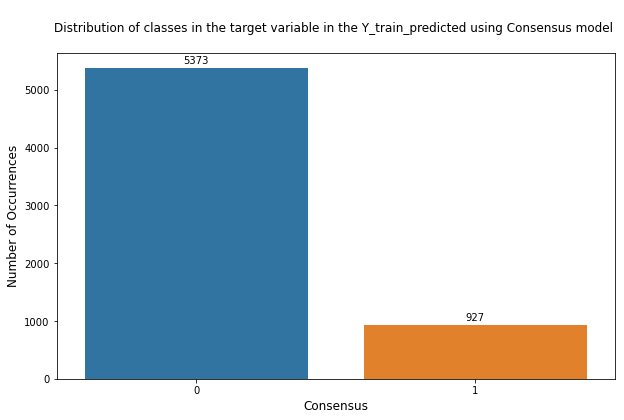

In [133]:
### Barplot for y_train_pred data
titlex      =     'Distribution of classes in the target variable in the Y_train_predicted using Consensus model '
draw_barplot(data = X_train_data, title = titlex, target= 'Consensus')


Training data




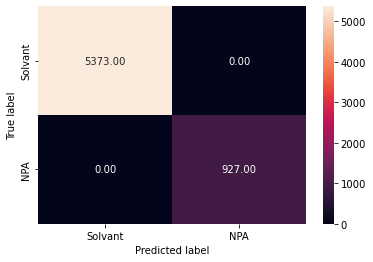

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5373
           1       1.00      1.00      1.00       927

    accuracy                           1.00      6300
   macro avg       1.00      1.00      1.00      6300
weighted avg       1.00      1.00      1.00      6300



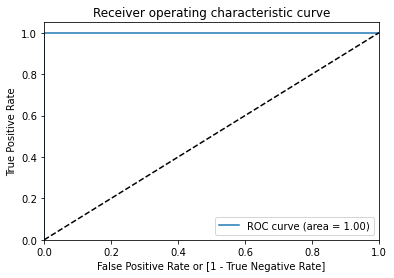

(array([0., 0., 1.]), array([0., 1., 1.]), array([2, 1, 0], dtype=int64))

In [134]:
actual    =  y_train['Target']
predicted =  X_train_data['Consensus']
print("\nTraining data\n\n")
draw_cm( actual, predicted)
draw_roc(actual, predicted)


Test data




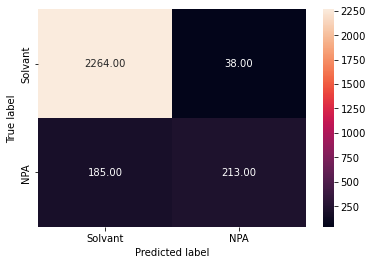

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2302
           1       0.85      0.54      0.66       398

    accuracy                           0.92      2700
   macro avg       0.89      0.76      0.80      2700
weighted avg       0.91      0.92      0.91      2700



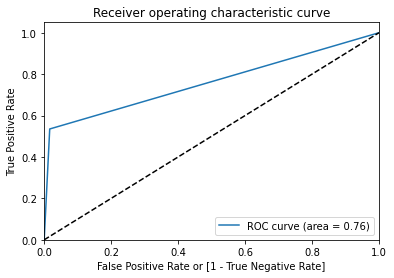

(array([0.        , 0.01650738, 1.        ]),
 array([0.        , 0.53517588, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [135]:
actual    =  y_test['Target']
predicted =  X_test_data['Consensus']
print("\nTest data\n\n")
draw_cm( actual, predicted)
draw_roc(actual, predicted)

In [136]:
X_train_.columns

Index(['Cash_ratio', 'Changeinsales_Industry', 'debt_equity', 'debt_income',
       'Interest_coverage', 'Quick_ratio', 'ROE(new)', 'ROS(new)', 'Sales_CE',
       'Total shareholders' funds'],
      dtype='object')

### Feature importance

Machine Learning models such as Decision trees (CART), Random Forest, XGBoost offer importance scores based on the reduction in the criterion used to select split points based on entropy

### Random Forest

<function matplotlib.pyplot.show(close=None, block=None)>

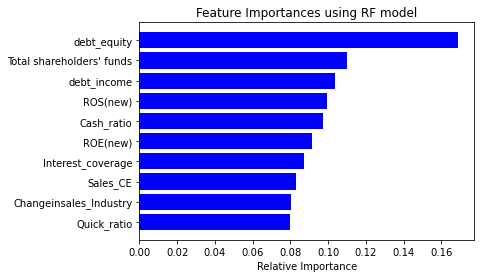

In [137]:
importances                 =   clf_RF.feature_importances_
indices                     =   np.argsort(importances)
feature_names               =   X_train_.columns

plt.title('Feature Importances using RF model')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show

In [138]:
idf =  pd.DataFrame({'Name' : [feature_names[i] for i in indices], 'Value' : importances[indices] *100 })

In [139]:
idf.sort_values('Value', ascending = False, inplace = True)
idf.set_index(keys = 'Name', inplace = True)

In [140]:
print("\nFeature importance - Random Forest Model")
print(idf)


Feature importance - Random Forest Model
                               Value
Name                                
debt_equity                16.887628
Total shareholders' funds  10.975950
debt_income                10.342641
ROS(new)                    9.921981
Cash_ratio                  9.728553
ROE(new)                    9.121483
Interest_coverage           8.707729
Sales_CE                    8.303369
Changeinsales_Industry      8.022778
Quick_ratio                 7.987887


### Decision Tree (CART)

<function matplotlib.pyplot.show(close=None, block=None)>

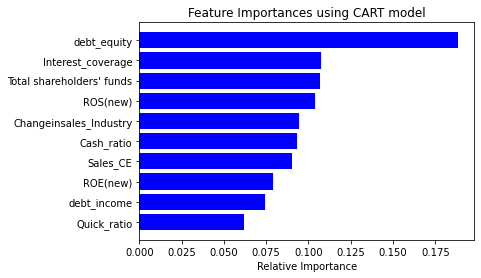

In [141]:
importances                 =   clf_gini.feature_importances_
indices                     =   np.argsort(importances)
feature_names               =   X_train_.columns

plt.title('Feature Importances using CART model')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show

In [142]:
idf =  pd.DataFrame({'Name' : [feature_names[i] for i in indices], 'Value' : importances[indices] *100 })

In [143]:
idf.sort_values('Value', ascending = False, inplace = True)
idf.set_index(keys = 'Name', inplace = True)

In [144]:
print("\nFeature importance - Decision Tree (CART) Model")
print(idf)


Feature importance - Decision Tree (CART) Model
                               Value
Name                                
debt_equity                18.850096
Interest_coverage          10.736753
Total shareholders' funds  10.684973
ROS(new)                   10.390107
Changeinsales_Industry      9.463039
Cash_ratio                  9.319012
Sales_CE                    9.042377
ROE(new)                    7.925523
debt_income                 7.411608
Quick_ratio                 6.176511


### XGBoost

<function matplotlib.pyplot.show(close=None, block=None)>

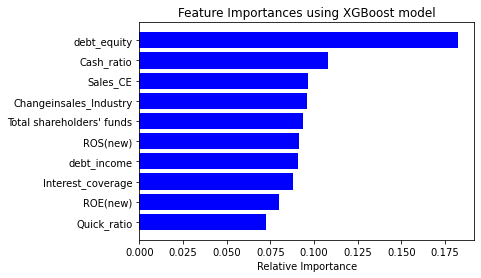

In [145]:
importances                 =   clf_XGB.feature_importances_
indices                     =   np.argsort(importances)
feature_names               =   X_train_.columns

plt.title('Feature Importances using XGBoost model')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show

In [146]:
idf =  pd.DataFrame({'Name' : [feature_names[i] for i in indices], 'Value' : importances[indices] *100 })

In [147]:
idf.sort_values('Value', ascending = False, inplace = True)
idf.set_index(keys = 'Name', inplace = True)

In [148]:
print("\nFeature importance - XGBoost Model")
print(idf)


Feature importance - XGBoost Model
                               Value
Name                                
debt_equity                18.260035
Cash_ratio                 10.824765
Sales_CE                    9.646420
Changeinsales_Industry      9.591148
Total shareholders' funds   9.362804
ROS(new)                    9.152265
debt_income                 9.100076
Interest_coverage           8.780775
ROE(new)                    8.004241
Quick_ratio                 7.277470


### END